# Experiment on Different Time-series Similarity Measures 1

### Loading

In [1]:
# load image and libraries
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
from scipy import signal
from sklearn import preprocessing

root_path = './processed_datasets/'
datasets = ['has', 'sp', 'fp', 'rb', 'sd', 'sr', 'hasb', 'ihas']

# load ground truth
ori_data_X = []
ori_data_y = []
sketch_X = []
for dataset in datasets:
    file_name = root_path + 'original_' + dataset  
    ori_data_X.append(np.load(file_name + '_X' + '.npy'))
    ori_data_y.append(np.load(file_name + '_y' + '.npy'))
    file_name = root_path + 'sketch_' + dataset + '.npy'
    sketch_X.append(np.load(file_name, allow_pickle=True)[:100])
print(f"number of loaded samples per class: {[len(x) for x in sketch_X]}")
print(f"Original data: {len(ori_data_X)} datasets")
print(f"Sketch data: {len(sketch_X)} datasets")


number of loaded samples per class: [100, 100, 100, 100, 100, 100, 100, 100]
Original data: 8 datasets
Sketch data: 8 datasets


### Sliding Window

In [2]:
def sliding_window(ori_series, clip_series, measure):
    """
    Compute the similarities of the original and the clipped series using sliding window
    input: original time series, clipped series, similarity measure function
    output: similarity_distribution, matching result, i.e., starting and ending points
    """
    ori_len = ori_series.shape[0]
    clip_len = clip_series.shape[0]
    if ori_len < clip_len:
        return None

    # compute the similarity between the original and the clipped series
    sim = []
    # compute the similarity between the original and the clipped series using sliding window
    for i in range(ori_len - clip_len + 1):
        sim.append(measure(ori_series[i:i+clip_len], clip_series))
    # find the maximum similarity and the corresponding starting and ending points
    max_idx = np.argmax(sim)
    return sim, [max_idx, max_idx + clip_len - 1]


In [3]:
def pointwise_exp(ori_data_X, ori_data_y, sketch_X, measure):
    results = []
    for i, dataset in enumerate(datasets):
        original = ori_data_X[i]
        label = ori_data_y[i]
        dummy_record = []
        for sample in sketch_X[i]:
            clip =  signal.resample(sample, label[1]-label[0]+1)
            sim_dist, pred_loc = sliding_window(original, clip, measure)
            dummy_record.append([sim_dist, pred_loc])
        results.append(dummy_record)
    return results

### Experiment 1.1: Euclidean Distance

#### Define measure

In [4]:
def euclidean_distance(x,y):
    t = preprocessing.Normalizer()
    x = np.expand_dims(x, axis=0)
    y = np.expand_dims(y, axis=0)
    plt.figure()
    plt.plot(x, 'o')
    plt.plot(y, 'o')
    plt.show()
    return np.linalg.norm(t.transform(x) - t.transform(y))

In [ ]:
#Qetch Algorithm -- inclomplete --

def width(series):
    # Should return width of series


    return 
    
def height(series):
    # Should return width of series

    return 

def get_LDE(sketch_split,Candidate_split,Gx,Gy):
    Rx = width(Candidate_split)/(Gx * width(sketch_split))    
    Ry = height(Candidate_split)/(Gy * height(sketch_split))  
    return (np.log(Rx)**2)+(np.log(Ry)**2)

def get_ShapeError(Sketch,Candidate,Gx,Gy,k):


    return 
def calculatDistance(Sketch, Candidate,k):
    # Calculating Global non uniform Scaling facctors
    Gx = width(Candidate)/width(Sketch)
    Gy = height(Candidate)/height(Sketch)
    # Calculating Shape error
    SE = get_ShapeError(Sketch,Candidate,Gx,Gy)
    sketch_split = np.split(Sketch,k)
    Candidate_split = np.split(Candidate,k)
    # Calculating Local distortion errors
    LDE = 0
    for i in range(k):
        LDE += get_LDE(Sketch[i],Candidate[i],Gx,Gy,k)

    # Calculating total error
    Dist = LDE + SE
    return Dist


#### Get results

In [5]:
results_eu = pointwise_exp(ori_data_X, ori_data_y, sketch_X, euclidean_distance)

#### Anlysis

Dataset: has
Number of samples: 100
Average similarity: 0.8688199296954199
Average location error: 76.58394160583941%
Dataset: sp
Number of samples: 100
Average similarity: 0.8943248327170922
Average location error: 69.34513274336283%
Dataset: fp
Number of samples: 100
Average similarity: 1.0265071957548568
Average location error: 180.15151515151513%
Dataset: rb
Number of samples: 100
Average similarity: 1.139434105798167
Average location error: 55.5968992248062%
Dataset: sd
Number of samples: 100
Average similarity: 0.5860131303404392
Average location error: 123.02%
Dataset: sr
Number of samples: 100
Average similarity: 1.239032869638887
Average location error: 40.40983606557377%
Dataset: hasb
Number of samples: 100
Average similarity: 0.6696841035022328
Average location error: 230.40909090909096%
Dataset: ihas
Number of samples: 100
Average similarity: 0.7527683427513157
Average location error: 43.4%


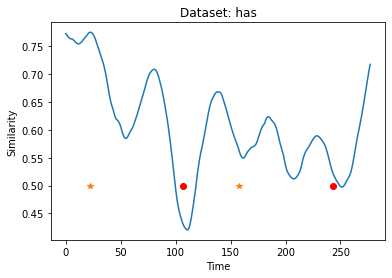

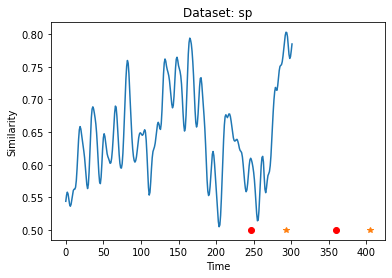

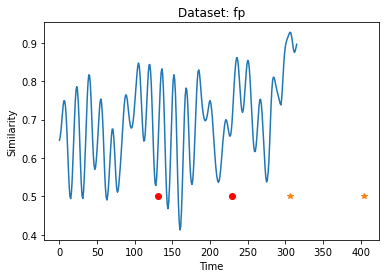

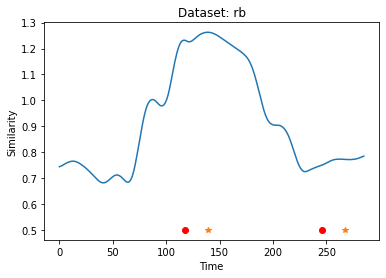

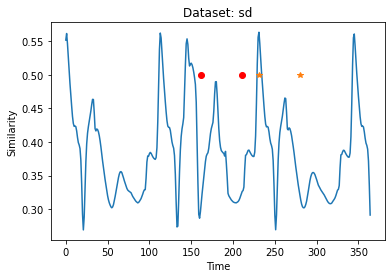

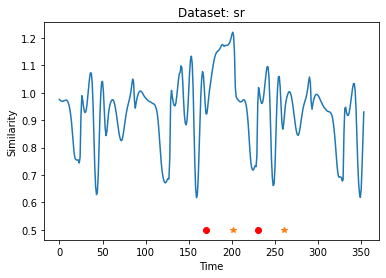

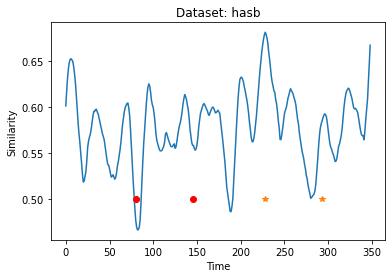

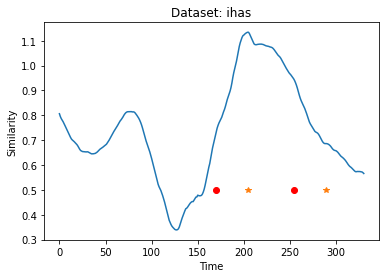

In [6]:
for i in range(len(results_eu)):
    print(f"Dataset: {datasets[i]}")
    print(f"Number of samples: {len(results_eu[i])}")
    print(f"Average similarity: {np.mean([np.max(x[0]) for x in results_eu[i]])}")
    print(f"Average location error: {np.mean([np.abs(x[1][0] - ori_data_y[i][0])/ (ori_data_y[i][1]-ori_data_y[i][0]+1)*100 for x in results_eu[i]])}%")

for i in range(len(results_eu)):
    plt.figure()
    plt.title(f"Dataset: {datasets[i]}")
    plt.xlabel("Time")
    plt.ylabel("Similarity")
    plt.plot(results_eu[i][0][0])
    plt.plot(results_eu[i][0][1], [0.5, 0.5], marker='*', ls='none')
    plt.plot(ori_data_y[i], [0.5, 0.5], marker='o', color='r', ls='none')
    plt.show()
